# Statistical Tests

### Imports

In [21]:
import pandas as pd
import os
from scipy.stats import wilcoxon


# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

### Paths

In [13]:
# Path to the folder containing the GitHub repository of BeatPD-CLSP-JHU
sPathGithub = os.getcwd()

### Files to compare the distribution  

In [78]:
msek_dyskinesia_combhpfnoinact = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_dyskinesia_combhpfnoinact.csv', header=None)
msek_dyskinesia_combhpfnoinact_noise = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_dyskinesia_combhpfnoinact.noise_mu_0_sig_0.1.csv', header=None)
msek_dyskinesia_combhpfnoinact_resample_09 = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_dyskinesia_combhpfnoinact_resample_0.9.csv', header=None)
msek_dyskinesia_combhpfnoinact_resample_11 = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_dyskinesia_combhpfnoinact_resample_1.1.csv', header=None)
msek_dyskinesia_combhpfnoinact_rotate_1 = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_dyskinesia_combhpfnoinact_rotate_1.csv', header=None)
msek_dyskinesia = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_dyskinesia.csv', header=None)

msek_tremor_combhpfnoinact = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_tremor_combhpfnoinact.csv', header=None)
msek_tremor_combhpfnoinact_noise = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_tremor_combhpfnoinact.noise_mu_0_sig_0.1.csv', header=None)
msek_tremor_combhpfnoinact_resample_09 = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_tremor_combhpfnoinact_resample_0.9.csv', header=None)
msek_tremor_combhpfnoinact_resample_11 = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_tremor_combhpfnoinact_resample_1.1.csv', header=None)
msek_tremor_combhpfnoinact_rotate_1 = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_tremor_combhpfnoinact_rotate_1.csv', header=None)
msek_tremor = pd.read_csv(sPathGithub+'/tsfresh/submit/xgb_msek/'+'msek_cis-pd_tremor.csv', header=None)

list_msek_dysk = {'msek_dyskinesia_combhpfnoinact': msek_dyskinesia_combhpfnoinact, 
            'msek_dyskinesia_combhpfnoinact_noise': msek_dyskinesia_combhpfnoinact_noise,
            'msek_dyskinesia_combhpfnoinact_resample_09': msek_dyskinesia_combhpfnoinact_resample_09,
            'msek_dyskinesia_combhpfnoinact_resample_11': msek_dyskinesia_combhpfnoinact_resample_11,
            'msek_dyskinesia_combhpfnoinact_rotate_1': msek_dyskinesia_combhpfnoinact_rotate_1,
            'msek_dyskinesia': msek_dyskinesia}

list_msek_tremor = {'msek_tremor_combhpfnoinact': msek_tremor_combhpfnoinact,
            'msek_tremor_combhpfnoinact_noise': msek_tremor_combhpfnoinact_noise,
            'msek_tremor_combhpfnoinact_resample_09': msek_tremor_combhpfnoinact_resample_09,
            'msek_tremor_combhpfnoinact_resample_11': msek_tremor_combhpfnoinact_resample_11,
            'msek_tremor_combhpfnoinact_rotate_1': msek_tremor_combhpfnoinact_rotate_1,
            'msek_tremor': msek_tremor}

### Visualization of MSEk for dyskinesia

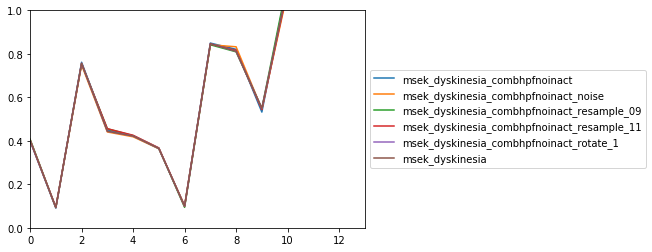

In [172]:
import matplotlib.pyplot as plt
# msek_dyskinesia_combhpfnoinact.plot(label="Baseline")
fig = plt.figure()
ax = plt.subplot(111)
for key, frame in list_msek_dysk.items():
    plt.plot(frame, label=key)

plt.xlim(0,13)
plt.ylim(0,1)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Kruskal-Wallis H Test

In [66]:
def print_stat(stat, p):
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    print('p : ', p)
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

### Dyskinesia 

In [104]:
for combo in combinations(list_msek_dysk, 4):  # 2 for pairs, 3 for triplets, etc
    print('------ ', combo[0] ,' and ', combo[1], '-----')
    stat, p = kruskal(list_msek_dysk[combo[0]].iloc[:,0],
                      list_msek_dysk[combo[1]].iloc[:,0],
                     list_msek_dysk[combo[2]].iloc[:,0],
                     list_msek_dysk[combo[3]].iloc[:,0])
#     print(list_msek_dysk[combo[0]].iloc[:,0])
    print(pd.concat([list_msek_dysk[combo[0]], list_msek_dysk[combo[1]]], axis=1))
    print_stat(stat, p)

------  msek_dyskinesia_combhpfnoinact  and  msek_dyskinesia_combhpfnoinact_noise -----
           0         0
0   0.399798  0.406265
1   0.090685  0.093463
2   0.761337  0.749130
3   0.449025  0.440728
4   0.421415  0.418576
5   0.363666  0.363843
6   0.099784  0.102328
7   0.849560  0.841584
8   0.820815  0.832500
9   0.532164  0.546704
10  1.126983  1.085307
Statistics=0.027, p=0.999
p :  0.9988297375486809
Same distributions (fail to reject H0)
------  msek_dyskinesia_combhpfnoinact  and  msek_dyskinesia_combhpfnoinact_noise -----
           0         0
0   0.399798  0.406265
1   0.090685  0.093463
2   0.761337  0.749130
3   0.449025  0.440728
4   0.421415  0.418576
5   0.363666  0.363843
6   0.099784  0.102328
7   0.849560  0.841584
8   0.820815  0.832500
9   0.532164  0.546704
10  1.126983  1.085307
Statistics=0.027, p=0.999
p :  0.9988297375486809
Same distributions (fail to reject H0)
------  msek_dyskinesia_combhpfnoinact  and  msek_dyskinesia_combhpfnoinact_noise -----
      

### Tremor

In [183]:
from itertools import combinations

for combo in combinations(list_msek_tremor, 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)
    print('------ ', combo[0] ,' and ', combo[1], '-----')
    stat, p = kruskal(list_msek_tremor[combo[0]].iloc[:,0], list_msek_tremor[combo[1]].iloc[:,0])
#     print(pd.concat([list_msek_dysk[combo[0]], list_msek_dysk[combo[1]]], axis=1))
    print_stat(stat, p)
    print('data1: median=%.3f mean=%.3f stdv=%.3f' % (median(list_msek_tremor[combo[0]]), mean(list_msek_tremor[combo[0]]), std(list_msek_tremor[combo[0]])))
    print('data2: median=%.3f mean=%.3f stdv=%.3f' % (median(list_msek_tremor[combo[1]]), mean(list_msek_tremor[combo[1]]), std(list_msek_tremor[combo[1]])))

('msek_tremor_combhpfnoinact', 'msek_tremor_combhpfnoinact_noise')
------  msek_tremor_combhpfnoinact  and  msek_tremor_combhpfnoinact_noise -----
Statistics=0.016, p=0.898
p :  0.8979866418423446
Same distributions (fail to reject H0)
data1: median=0.340 mean=0.498 stdv=0.380
data2: median=0.343 mean=0.503 stdv=0.387
('msek_tremor_combhpfnoinact', 'msek_tremor_combhpfnoinact_resample_09')
------  msek_tremor_combhpfnoinact  and  msek_tremor_combhpfnoinact_resample_09 -----
Statistics=0.006, p=0.939
p :  0.9386847392067001
Same distributions (fail to reject H0)
data1: median=0.340 mean=0.498 stdv=0.380
data2: median=0.327 mean=0.499 stdv=0.382
('msek_tremor_combhpfnoinact', 'msek_tremor_combhpfnoinact_resample_11')
------  msek_tremor_combhpfnoinact  and  msek_tremor_combhpfnoinact_resample_11 -----
Statistics=0.016, p=0.898
p :  0.8979866418423446
Same distributions (fail to reject H0)
data1: median=0.340 mean=0.498 stdv=0.380
data2: median=0.340 mean=0.504 stdv=0.387
('msek_tremor_co

# Wilcoxon's Test

### Dyskinesia

In [182]:
from itertools import combinations

for combo in combinations(list_msek_dysk, 2):  # 2 for pairs, 3 for triplets, etc
    print('------ ', combo[0] ,' and ', combo[1], '-----')
    stat, p = wilcoxon(list_msek_dysk[combo[0]].iloc[:,0], list_msek_dysk[combo[1]].iloc[:,0])
    print('mean : ', list_msek_dysk[combo[0]].iloc[:,0].mean(), ' and ', list_msek_dysk[combo[1]].iloc[:,0].mean())
#     print(pd.concat([list_msek_dysk[combo[0]], list_msek_dysk[combo[1]]], axis=1))
    print_stat(stat, p)
    print('data1: median=%.3f mean=%.3f stdv=%.3f' % (median(list_msek_dysk[combo[0]]), mean(list_msek_dysk[combo[0]]), std(list_msek_dysk[combo[0]])))
    print('data2: median=%.3f mean=%.3f stdv=%.3f' % (median(list_msek_dysk[combo[1]]), mean(list_msek_dysk[combo[1]]), std(list_msek_dysk[combo[1]])))

------  msek_dyskinesia_combhpfnoinact  and  msek_dyskinesia_combhpfnoinact_noise -----
mean :  0.5377481899472157  and  0.5345843613058506
Statistics=29.000, p=0.722
p :  0.7221076526150257
Same distributions (fail to reject H0)
data1: median=0.449 mean=0.538 stdv=0.307
data2: median=0.441 mean=0.535 stdv=0.299
------  msek_dyskinesia_combhpfnoinact  and  msek_dyskinesia_combhpfnoinact_resample_09 -----
mean :  0.5377481899472157  and  0.5393191362732007
Statistics=28.000, p=0.657
p :  0.6566419342620566
Same distributions (fail to reject H0)
data1: median=0.449 mean=0.538 stdv=0.307
data2: median=0.455 mean=0.539 stdv=0.307
------  msek_dyskinesia_combhpfnoinact  and  msek_dyskinesia_combhpfnoinact_resample_11 -----
mean :  0.5377481899472157  and  0.5363304149870849
Statistics=32.000, p=0.929
p :  0.9291527647091152
Same distributions (fail to reject H0)
data1: median=0.449 mean=0.538 stdv=0.307
data2: median=0.456 mean=0.536 stdv=0.300
------  msek_dyskinesia_combhpfnoinact  and  m

### Tremor

In [181]:
from itertools import combinations

for combo in combinations(list_msek_tremor, 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)
    print('------ ', combo[0] ,' and ', combo[1], '-----')
    stat, p = wilcoxon(list_msek_tremor[combo[0]].iloc[:,0], list_msek_tremor[combo[1]].iloc[:,0])
#     print(pd.concat([list_msek_dysk[combo[0]], list_msek_dysk[combo[1]]], axis=1))
    print_stat(stat, p)
    print('data1: median=%.3f mean=%.3f stdv=%.3f' % (median(list_msek_tremor[combo[0]]), mean(list_msek_tremor[combo[0]]), std(list_msek_tremor[combo[0]])))
    print('data2: median=%.3f mean=%.3f stdv=%.3f' % (median(list_msek_tremor[combo[1]]), mean(list_msek_tremor[combo[1]]), std(list_msek_tremor[combo[1]])))

('msek_tremor_combhpfnoinact', 'msek_tremor_combhpfnoinact_noise')
------  msek_tremor_combhpfnoinact  and  msek_tremor_combhpfnoinact_noise -----
Statistics=25.000, p=0.152
p :  0.15195618574341052
Same distributions (fail to reject H0)
data1: median=0.340 mean=0.498 stdv=0.380
data2: median=0.343 mean=0.503 stdv=0.387
('msek_tremor_combhpfnoinact', 'msek_tremor_combhpfnoinact_resample_09')
------  msek_tremor_combhpfnoinact  and  msek_tremor_combhpfnoinact_resample_09 -----
Statistics=43.000, p=0.861
p :  0.8613042569883052
Same distributions (fail to reject H0)
data1: median=0.340 mean=0.498 stdv=0.380
data2: median=0.327 mean=0.499 stdv=0.382
('msek_tremor_combhpfnoinact', 'msek_tremor_combhpfnoinact_resample_11')
------  msek_tremor_combhpfnoinact  and  msek_tremor_combhpfnoinact_resample_11 -----
Statistics=17.000, p=0.046
p :  0.046399461870904636
Different distributions (reject H0)
data1: median=0.340 mean=0.498 stdv=0.380
data2: median=0.340 mean=0.504 stdv=0.387
('msek_tremor

/home/mpgill/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2803: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


# Drafts to understand how the tests works 

In [180]:
import numpy as np 
from numpy import mean
from numpy import median
from numpy import std

data1 = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
data2 = pd.DataFrame([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
data3 = pd.DataFrame([-3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
the_list = {'data1': data1, 'data2': data2, 'data3': data3}

print('data1: Median=%.3f mean=%.3f stdv=%.3f' % (median(data1), mean(data1), std(data1)))
print('data2: Median=%.3f mean=%.3f stdv=%.3f' % (median(data2), mean(data2), std(data2)))
print('data3: Median=%.3f  mean=%.3f stdv=%.3f' % (median(data3), mean(data3), std(data3)))

data1: Median=10.500 mean=10.500 stdv=5.766
data2: Median=12.500 mean=12.500 stdv=5.766
data3: Median=12.500  mean=12.200 stdv=6.377


In [175]:
for combo in combinations(the_list, 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)
    print('------ ', combo[0] ,' and ', combo[1], '-----')
    stat, p = wilcoxon(the_list[combo[0]].iloc[:,0], the_list[combo[1]].iloc[:,0])
#     print(pd.concat([list_msek_dysk[combo[0]], list_msek_dysk[combo[1]]], axis=1))
    print_stat(stat, p)

('data1', 'data2')
------  data1  and  data2 -----
Statistics=0.000, p=0.000
p :  7.74421643104407e-06
Different distributions (reject H0)
('data1', 'data3')
------  data1  and  data3 -----
Statistics=20.000, p=0.000
p :  0.0003929930264148809
Different distributions (reject H0)
('data2', 'data3')
------  data2  and  data3 -----
Statistics=0.000, p=0.317
p :  0.31731050786291415
Same distributions (fail to reject H0)


In [176]:
for combo in combinations(the_list, 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)
    print('------ ', combo[0] ,' and ', combo[1], '-----')
    stat, p = kruskal(the_list[combo[0]].iloc[:,0], the_list[combo[1]].iloc[:,0])
#     print(pd.concat([list_msek_dysk[combo[0]], list_msek_dysk[combo[1]]], axis=1))
    print_stat(stat, p)

('data1', 'data2')
------  data1  and  data2 -----
Statistics=1.058, p=0.304
p :  0.30358667675104756
Same distributions (fail to reject H0)
('data1', 'data3')
------  data1  and  data3 -----
Statistics=0.924, p=0.337
p :  0.3365296536029737
Same distributions (fail to reject H0)
('data2', 'data3')
------  data2  and  data3 -----
Statistics=0.000, p=0.989
p :  0.9891992756743226
Same distributions (fail to reject H0)
